In [252]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

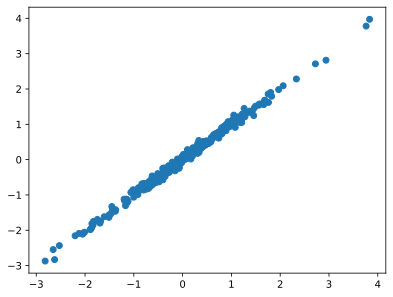

In [253]:
# create synthetic data

N = 300 #The number of samples
x = torch.randn(N,1) #torch function for random number generator
y = x + torch.randn(N,1) / 14 # torch.randn(N,1) is an added noise

# and plot
plt.plot(x,y,'o')
plt.show()

In [254]:
# build model
ANN_model = nn.Sequential(
    nn.Linear(1,1),  # input layer: (1,1) first 1 is the number of features going in, second 1 is the number of output of hidden layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer: (1,1) first 1 is the output going out of hidden layer, second 1 is the result after the output layer
    )

ANN_model #model summary

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [255]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimization
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=learningRate)

In [256]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs) # instantiate the losses to zero


## for loop to run on each epoch
for epochi in range(numepochs):

  # forward pass
  yHat = ANN_model(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

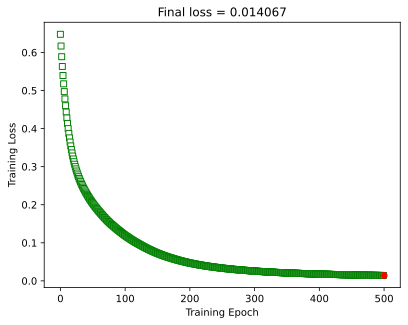

In [257]:
# create predictions for every values of x
predictions = ANN_model(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() #Mean Squared Error

plt.plot(losses.detach(),'gs',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Training Epoch')
plt.ylabel('Training Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [258]:
testloss.item()

0.01406701747328043

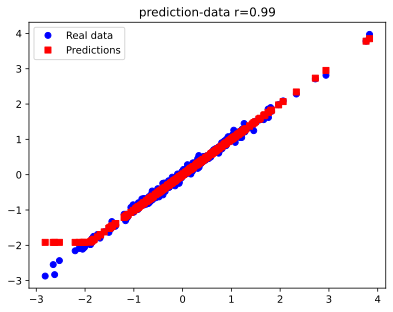

In [259]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Experiments

1. Vary the value of N and rerun the codes, contrast and compare the result.

2. Vary the value of the noise torch.randn(N,1), try multiplying it with a constant, try dividing it with a constant,c. How does the result differ? How does the noise affect the performance of the model?

3. Try experimenting with the learning rate, how does learning rate affect the model?
4. Use N>999, split the data into training and testing, train a model and determine its performance on the test data.

#Experiment 3

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# --- Generate synthetic data ---
N = 300
x = torch.randn(N, 1)
y = x + torch.randn(N, 1)

# --- Learning rates to test ---
learning_rates = [0.0012, 0.05, 0.19, 0.3123, 0.61]
numepochs = 200
results_loss = {}
results_corr = {}
final_results = []

# --- Train model for each learning rate ---
for lr in learning_rates:
    model = nn.Sequential(nn.Linear(1, 1), nn.ReLU(), nn.Linear(1, 1))
    lossfun = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    loss_progress = []
    corr_progress = []

    for epochi in range(numepochs):
        # forward pass
        yHat = model(x)
        loss = lossfun(yHat, y)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # record metrics
        loss_progress.append(loss.item())

        preds = model(x).detach()
        if torch.std(preds) == 0:
            r = 0.0
        else:
            r = np.corrcoef(y.T, preds.T)[0, 1]
        corr_progress.append(r)

    results_loss[lr] = loss_progress
    results_corr[lr] = corr_progress

    # store final results for printing
    final_loss = loss_progress[-1]
    final_corr = corr_progress[-1]
    final_results.append((lr, final_loss, final_corr))


# --- Style setup for consistent visualization ---
linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
markers = ['o', 's', 'D', '^', 'x']
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

# --- Plot 1: Loss progression ---
plt.figure(figsize=(7, 4))
for (lr, losses), ls, mk, col in zip(results_loss.items(), linestyles, markers, colors):
    plt.plot(range(numepochs), losses, linestyle=ls, marker=mk, markevery=20,
             label=f'lr={lr:.4f}', color=col)
plt.xlabel('Epoch')
plt.ylabel('Training Loss (MSE)')
plt.title('Loss Progression Across Learning Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Plot 2: Correlation progression ---
plt.figure(figsize=(7, 4))
for (lr, corrs), ls, mk, col in zip(results_corr.items(), linestyles, markers, colors):
    plt.plot(range(numepochs), corrs, linestyle=ls, marker=mk, markevery=20,
             label=f'lr={lr:.4f}', color=col)
plt.xlabel('Epoch')
plt.ylabel('Correlation (r)')
plt.title('Correlation Progression Across Learning Rates')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Print final results table ---
print("=============================================")
print(" Learning Rate | Final Loss (MSE) | Final r ")
print("=============================================")
for lr, loss_val, corr_val in final_results:
    print(f"   {lr:<10.5f} |     {loss_val:<12.6f} |  {corr_val:<7.4f}")
print("=============================================")


#Experiment 4

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


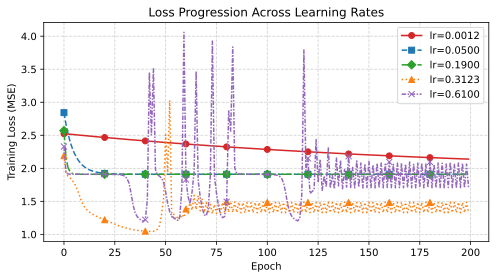

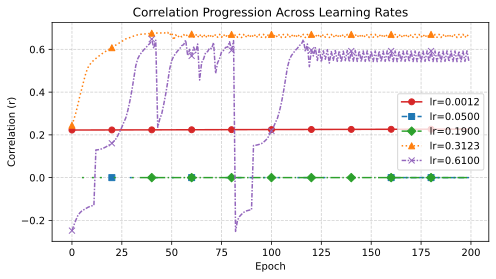

 Learning Rate | Final Loss (MSE) | Final r 
   0.00120    |     2.139109     |  0.2270 
   0.05000    |     1.909727     |  0.0000 
   0.19000    |     1.909727     |  0.0000 
   0.31230    |     1.328781     |  0.6565 
   0.61000    |     1.710141     |  0.5423 


In [311]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# create synthetic data
N = 1200  # number of samples > 999
x = torch.randn(N, 1)
y = x + torch.randn(N, 1) * 0.5  # add moderate noise

# split into training and testing (80% train, 20% test)
train_size = int(0.8 * N)
x_train = x[:train_size]
y_train = y[:train_size]
x_test = x[train_size:]
y_test = y[train_size:]

# build model
ANN_model = nn.Sequential(
    nn.Linear(1, 1),  # more hidden neurons for flexibility
    nn.ReLU(),
    nn.Linear(1, 1)
)

# define learning rate, loss function, optimizer
learningRate = 0.05
lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(ANN_model.parameters(), lr=learningRate)

# train the model
numepochs = 500
train_losses = torch.zeros(numepochs)
test_losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass (training data)
    yHat = ANN_model(x_train)
    loss = lossfun(yHat, y_train)
    train_losses[epochi] = loss

    # backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # evaluate on test data (no gradient tracking)
    with torch.no_grad():
        yHatTest = ANN_model(x_test)
        test_loss = lossfun(yHatTest, y_test)
        test_losses[epochi] = test_loss

# evaluate final performance
with torch.no_grad():
    predictions = ANN_model(x_test)
    final_test_loss = lossfun(predictions, y_test).item()
    r_test = np.corrcoef(y_test.T, predictions.T)[0,1]

# plot training and test loss
plt.plot(train_losses.detach(), label='Train Loss')
plt.plot(test_losses.detach(), label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Training vs Test Loss (Final Test Loss = {final_test_loss:.4f})')
plt.legend()
plt.show()

# plot predictions vs real data
plt.plot(x_train, y_train, 'bo', label='Train Data', alpha=0.3)
plt.plot(x_test, y_test, 'ro', label='Test Data', alpha=0.3)
plt.plot(x_test, predictions, 'gs', label='Predictions', alpha=0.8)
plt.legend()
plt.title(f'Prediction Performance (r = {r_test:.2f})')
plt.show()
